### Classifica√ß√£o de Dados usando Modelos de Aprendizado de M√°quina e Rede Neural Artificial
### Professor Carlos Santos - Instituto Federal Farroupilha C√¢mpus Alegrete

### ETAPA 1 - Entendimento do Neg√≥cio

In [93]:
'''
Previs√£o de Resposta a Campanhas de Marketing

Este notebook utiliza diferentes algoritmos de classifica√ß√£o para prever se um cliente aceitar√° ou n√£o uma oferta de dep√≥sito a prazo de um banco,
com base no conjunto de dados **Bank Marketing Dataset**.

Objetivo:
 - Classificar clientes como `sim` ou `n√£o` para a aceita√ß√£o da campanha.

Algoritmos Utilizados:
 - Naive Bayes
 - √Årvore de Decis√£o
 - Random Forest
 - Gradient Boosting
 - K-Nearest Neighbors (KNN)
 - Support Vector Machines (SVM)
 - Rede Neural Artificial

Metodologia utilizada:
 - CRISP-DM (Cross-Industry Standard Process for Data Mining)
 '''

'\nPrevis√£o de Resposta a Campanhas de Marketing\n\nEste notebook utiliza diferentes algoritmos de classifica√ß√£o para prever se um cliente aceitar√° ou n√£o uma oferta de dep√≥sito a prazo de um banco,\ncom base no conjunto de dados **Bank Marketing Dataset**.\n\nObjetivo:\n - Classificar clientes como `sim` ou `n√£o` para a aceita√ß√£o da campanha.\n\nAlgoritmos Utilizados:\n - Naive Bayes\n - √Årvore de Decis√£o\n - Random Forest\n - Gradient Boosting\n - K-Nearest Neighbors (KNN)\n - Support Vector Machines (SVM)\n - Rede Neural Artificial\n\nMetodologia utilizada:\n - CRISP-DM (Cross-Industry Standard Process for Data Mining)\n '

### ETAPA 2 - Entendimento dos Dados

In [94]:
'''
Informa√ß√µes sobre o conjunto de dados Bank Marketing Dataset

- Tamanho: Cont√©m cerca de 41.000 registros com 21 colunas. Pode ser facilmente carregado na mem√≥ria e manipulado com ferramentas padr√£o como pandas.
- Colunas: descrevem atributos como idade, saldo, dura√ß√£o da campanha, entre outros, relacionados √† resposta do cliente √† campanha de marketing (compra ou n√£o do produto).
- Formato: formato CSV, pronto para ser usado diretamente com pandas.
- Relacionamento Claro com Neg√≥cios: O objetivo √© prever se um cliente ir√° aceitar uma oferta de dep√≥sito a prazo, o que √© muito pr√≥ximo do cen√°rio de previs√£o de compras.
Um dep√≥sito a prazo √© uma modalidade de dep√≥sito em que o cliente de uma institui√ß√£o financeira recebe juros em troca de manter recursos monet√°rios depositados por um
prazo pr√©-determinado.
'''

'\nInforma√ß√µes sobre o conjunto de dados Bank Marketing Dataset\n\n- Tamanho: Cont√©m cerca de 41.000 registros com 21 colunas. Pode ser facilmente carregado na mem√≥ria e manipulado com ferramentas padr√£o como pandas.\n- Colunas: descrevem atributos como idade, saldo, dura√ß√£o da campanha, entre outros, relacionados √† resposta do cliente √† campanha de marketing (compra ou n√£o do produto).\n- Formato: formato CSV, pronto para ser usado diretamente com pandas.\n- Relacionamento Claro com Neg√≥cios: O objetivo √© prever se um cliente ir√° aceitar uma oferta de dep√≥sito a prazo, o que √© muito pr√≥ximo do cen√°rio de previs√£o de compras.\nUm dep√≥sito a prazo √© uma modalidade de dep√≥sito em que o cliente de uma institui√ß√£o financeira recebe juros em troca de manter recursos monet√°rios depositados por um\nprazo pr√©-determinado.\n'

In [95]:
# Importa√ß√£o de Bibliotecas

import pandas as pd  # Manipula√ß√£o de dados
import numpy as np  # Opera√ß√µes matem√°ticas e manipula√ß√£o de arrays
from sklearn.model_selection import train_test_split  # Divis√£o de conjuntos de dados
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normaliza√ß√£o e codifica√ß√£o
from sklearn.tree import DecisionTreeClassifier  # Modelo de √Årvore de Decis√£o
from sklearn.neighbors import KNeighborsClassifier  # Modelo KNN
from sklearn.ensemble import RandomForestClassifier  # Modelo Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # M√©tricas de avalia√ß√£o
import matplotlib.pyplot as plt  # Visualiza√ß√£o de dados
import seaborn as sns  # Gr√°ficos estilizados
from tensorflow.keras.models import Sequential  # Cria√ß√£o de redes neurais sequenciais
from tensorflow.keras.layers import Dense, Input  # Camadas densas e de entrada para redes neurais
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Machines
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting

### ETAPA 3 - Prepara√ß√£o dos Dados

In [96]:
# Pr√©-Processamento dos Dados

# Carregando o conjunto de dados manualmente no Google Colab
from google.colab import files
import io

# Fazer upload do arquivo
print("Por favor, carregue o arquivo CSV do conjunto de dados.")
uploaded = files.upload()

# Identificando o nome do arquivo carregado
filename = list(uploaded.keys())[0]

# Carregar o arquivo em um DataFrame pandas
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";")

'''
CSV, JSON e XML s√£o formatos de armazenamento e troca de dados, cada um com caracter√≠sticas distintas:
CSV (Comma-Separated Values): Formato simples e leve, ideal para armazenar dados tabulares, mas sem suporte a hierarquias ou metadados.
JSON (JavaScript Object Notation): Estruturado, leve e f√°cil de ler, suporta hierarquias e √© amplamente usado em APIs e aplica√ß√µes web.
XML (Extensible Markup Language): Estruturado e robusto, permite metadados e valida√ß√£o com schemas, mas √© mais verboso que JSON.
'''

# Exibindo as primeiras linhas para entender os dados
print("Visualizando as primeiras linhas do conjunto de dados:")
print(data.head().iloc[:, :5])    # .iloc √© usado para indexa√ß√£o baseada em posi√ß√£o (linha, coluna).

# Verificar a quantidade de linhas e colunas
print(f"Quantidade de linhas: {data.shape[0]}")   # No pandas quando se usa o shape ele retorna (linhas, colunas)
print(f"Quantidade de colunas: {data.shape[1]}")

# Verificar os nomes das colunas
print("\nNomes das colunas:")
print(data.columns.tolist())

# Visualizar os tipos de dados de cada coluna
print("\nTipos de dados das colunas:")
print(data.dtypes)

Por favor, carregue o arquivo CSV do conjunto de dados.


Saving bank-additional-full-ptbr.csv to bank-additional-full-ptbr (1).csv
Visualizando as primeiras linhas do conjunto de dados:
   idade            profissao estado_civil          escolaridade  inadimplente
0     56  empregada dom√©stica       casado  fundamental (4 anos)           n√£o
1     57             servi√ßos       casado          ensino m√©dio  desconhecido
2     37             servi√ßos       casado          ensino m√©dio           n√£o
3     40       administrativo       casado  fundamental (6 anos)           n√£o
4     56             servi√ßos       casado          ensino m√©dio           n√£o
Quantidade de linhas: 41188
Quantidade de colunas: 21

Nomes das colunas:
['idade', 'profissao', 'estado_civil', 'escolaridade', 'inadimplente', 'emprestimo_habitacional', 'emprestimo_pessoal', 'tipo_contato', 'mes_contato', 'dia_da_semana', 'duracao_contato', 'numero_contatos', 'dias_ultimo_contato', 'contatos_anteriores', 'resultado_campanha_anterior', 'taxa_variacao_emprego', 'ind

In [97]:
'''
Explica√ß√£o do dataset:

O dataset √© do tipo banc√°rio, com informa√ß√µes sobre campanhas de marketing.
A coluna 'assinou_deposito' indica se o cliente assinou (ou n√£o) um dep√≥sito a prazo ap√≥s a campanha.


Nomes das colunas:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Nomes das colunas (traduzidas):
['idade', 'profissao', 'estado_civil', 'escolaridade', 'inadimplente', 'emprestimo_habitacional', 'emprestimo_pessoal',
'tipo_contato', 'mes_contato', 'dia_da_semana', 'duracao_contato', 'numero_contatos', 'dias_ultimo_contato', 'contatos_anteriores',
'resultado_campanha_anterior', 'taxa_variacao_emprego', 'indice_precos_consumidor', 'indice_confianca_consumidor', 'euribor_3m',
'numero_empregados', 'assinou_deposito']

Esta coluna cont√©m valores como:
"yes" ‚Üí cliente assinou
"no" ‚Üí cliente n√£o assinou

Conclus√£o:
y √© a vari√°vel dependente, ou seja, a que queremos prever (classifica√ß√£o bin√°ria).
Todas as outras colunas (age, job, duration, etc.) s√£o vari√°veis independentes (features ou preditoras).
'''

'\nExplica√ß√£o do dataset:\n\nO dataset √© do tipo banc√°rio, com informa√ß√µes sobre campanhas de marketing.\nA coluna \'assinou_deposito\' indica se o cliente assinou (ou n√£o) um dep√≥sito a prazo ap√≥s a campanha.\n\n\nNomes das colunas:\n[\'age\', \'job\', \'marital\', \'education\', \'default\', \'housing\', \'loan\', \'contact\', \'month\', \'day_of_week\', \'duration\', \'campaign\', \'pdays\', \n\'previous\', \'poutcome\', \'emp.var.rate\', \'cons.price.idx\', \'cons.conf.idx\', \'euribor3m\', \'nr.employed\', \'y\']\n\n\nNomes das colunas (traduzidas):\n[\'idade\', \'profissao\', \'estado_civil\', \'escolaridade\', \'inadimplente\', \'emprestimo_habitacional\', \'emprestimo_pessoal\', \n\'tipo_contato\', \'mes_contato\', \'dia_da_semana\', \'duracao_contato\', \'numero_contatos\', \'dias_ultimo_contato\', \'contatos_anteriores\',\n\'resultado_campanha_anterior\', \'taxa_variacao_emprego\', \'indice_precos_consumidor\', \'indice_confianca_consumidor\', \'euribor_3m\', \n\'num

In [98]:
# Verificando valores ausentes
print("Verificando valores ausentes:")
print(data.isnull().sum())


'''
Identifica colunas com valores categ√≥ricos.
Cria codificadores para elas.
Transforma os textos em n√∫meros (essencial para modelos de machine learning, que s√≥ trabalham com n√∫meros).
'''
# Codifica√ß√£o de vari√°veis categ√≥ricas
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Separando os atributos (X) e o r√≥tulo (y)

# X = data.drop("y", axis=1)  # Atributos (vari√°veis independentes)
X = data.drop("assinou_deposito", axis=1)  # Atributos (vari√°veis independentes)
# y = data["y"]  # R√≥tulo (alvo) (vari√°vel dependente)
y = data["assinou_deposito"]  # R√≥tulo (alvo) (vari√°vel dependente)

'''
X (atributos/entradas)
y (r√≥tulo/sa√≠da)

X e y s√£o divigidos em subconjuntos:
X_train, y_train: usados para treinar o modelo.
X_test, y_test: usados para testar/avaliar o modelo.

test_size=0.3
Define que 30% dos dados v√£o para o conjunto de teste.
Os 70% restantes v√£o para o treino.
random_state=42. Garante que a divis√£o entre treino e teste seja reprodut√≠vel.
stratify=y. Essa √© uma op√ß√£o muito importante em problemas de classifica√ß√£o. Garante que a propor√ß√£o das classes seja a mesma nos dois conjuntos: treino e teste.
Isso evita vi√©s, especialmente quando os dados s√£o desbalanceados (ex: 90% da classe 0 e 10% da classe 1).
'''
# Dividindo os dados em conjunto de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizando os dados para melhorar o desempenho dos modelos

'''
Cria um bjeto chamado scaler que ser√° usado para padronizar (normalizar) os dados num√©ricos, usando a t√©cnica conhecida como padroniza√ß√£o z-score
que pega seus n√∫meros e ajusta eles para que fiquem numa escala comum.
Assim, n√∫meros muito grandes ou muito pequenos ficam mais compar√°veis entre si, ajudando o classificador a entender melhor os dados.
Modelos de machine learning (especialmente redes neurais, SVMs, KNN) funcionam melhor e mais r√°pido quando os dados est√£o em uma escala similar.
Evita que vari√°veis com valores grandes (ex: sal√°rio em milhares) dominem outras com valores menores (ex: idade).
'''
scaler = StandardScaler()  # Criando o objeto de normaliza√ß√£o
X_train = scaler.fit_transform(X_train)  # Ajustando e transformando os dados de treino
X_test = scaler.transform(X_test)  # Transformando os dados de teste com os mesmos par√¢metros


Verificando valores ausentes:
idade                          0
profissao                      0
estado_civil                   0
escolaridade                   0
inadimplente                   0
emprestimo_habitacional        0
emprestimo_pessoal             0
tipo_contato                   0
mes_contato                    0
dia_da_semana                  0
duracao_contato                0
numero_contatos                0
dias_ultimo_contato            0
contatos_anteriores            0
resultado_campanha_anterior    0
taxa_variacao_emprego          0
indice_precos_consumidor       0
indice_confianca_consumidor    0
euribor_3m                     0
numero_empregados              0
assinou_deposito               0
dtype: int64


<ipython-input-99-4037002354>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_plot, x='assinou_deposito', palette='pastel')


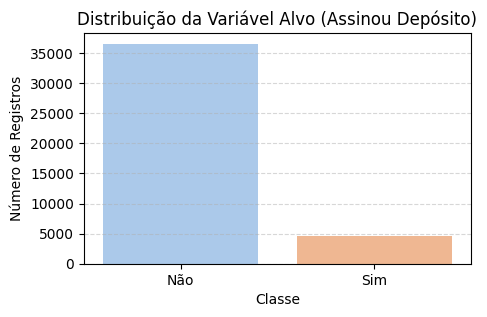

In [99]:
# Gr√°fico de distribui√ß√£o da vari√°vel alvo com a a frequ√™ncia de ades√£o √† campanha publicit√°ria
# Veja o qu√£o est√£o desbalanceados a quantidade de exemplos das classes! Se n√£o tratado pode criar vi√©s de classifica√ß√£o na classe majorit√°ria!

# Mapear 0 ‚Üí "N√£o" e 1 ‚Üí "Sim"
data_plot = data.copy()
data_plot['assinou_deposito'] = data_plot['assinou_deposito'].map({0: 'N√£o', 1: 'Sim'})

# Plotar o gr√°fico
plt.figure(figsize=(5, 3))
sns.countplot(data=data_plot, x='assinou_deposito', palette='pastel')
plt.title('Distribui√ß√£o da Vari√°vel Alvo (Assinou Dep√≥sito)')
plt.xlabel('Classe')
plt.ylabel('N√∫mero de Registros')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### ETAPAS 4 e 5 - Modelagem e Avalia√ß√£o

Modelo: Naive Bayes
Matriz de Confus√£o:
[[9662 1303]
 [ 545  847]]
Acur√°cia: 0.85
--------------------------------------------------
Modelo: √Årvore de Decis√£o
Matriz de Confus√£o:
[[10265   700]
 [  670   722]]
Acur√°cia: 0.89
--------------------------------------------------
Modelo: Random Forest
Matriz de Confus√£o:
[[10634   331]
 [  688   704]]
Acur√°cia: 0.92
--------------------------------------------------
Modelo: Gradient Boosting
Matriz de Confus√£o:
[[10613   352]
 [  665   727]]
Acur√°cia: 0.92
--------------------------------------------------
Modelo: K-Nearest Neighbors
Matriz de Confus√£o:
[[10599   366]
 [  860   532]]
Acur√°cia: 0.90
--------------------------------------------------
Modelo: Support Vector Machines (SVM)
Matriz de Confus√£o:
[[10731   234]
 [  876   516]]
Acur√°cia: 0.91
--------------------------------------------------
Resultados da Rede Neural:
Acur√°cia no conjunto de teste: 0.91
387/387 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

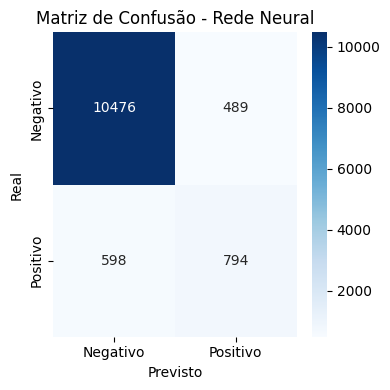

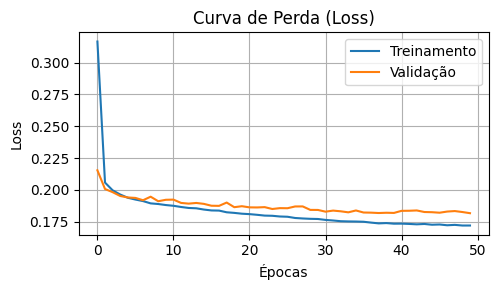

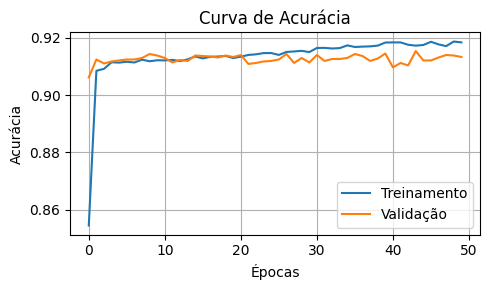

In [100]:
# Treinamento e Avalia√ß√£o dos Modelos

# Fun√ß√£o para treinar e avaliar os modelos
def train_and_evaluate_model(model, model_name):
    # Treinando o modelo
    model.fit(X_train, y_train)   # X_train s√£o as entradas (exemplos de dados). y_train	s√£o as sa√≠das (respostas corretas)

    # Fazendo previs√µes no conjunto de teste
    y_pred = model.predict(X_test)  # y_pred	s√£o as respostas que o modelo deu. X_test s√£o os novos exemplos para o modelo classificar
    y_pred = y_pred.astype(int)  # Garantindo que as previs√µes sejam inteiros

    # Avalia√ß√£o do desempenho
    print(f"Modelo: {model_name}")  # imprime o nome do modelo
    print("Matriz de Confus√£o:")
    print(confusion_matrix(y_test, y_pred))   # y_test s√£o as classifica√ß√µes corretas dos exemplos novos (Ground Truth) e y_pred √© a classifica√ß√£o que o modelo fez (a previs√£o do modelo).
    print(f"Acur√°cia: {accuracy_score(y_test, y_pred):.2f}")
    print("-" * 50) # imprimi uma linha horizontal com 50 tra√ßos


### Algoritmos de Machine Learning ###

# Naive Bayes
nb_model = GaussianNB()  # criando um modelo de aprendizado de m√°quina usando o algoritmo Naive Bayes
train_and_evaluate_model(nb_model, "Naive Bayes")

# √Årvore de Decis√£o
# random_state=42 √© utilizado para o algoritmo use sempre a mesma sequ√™ncia de aleatoriedade do conjunto de dados para que o resultado seja igual toda vez. √â importante usar o mesmo n√∫mero para que o resultado seja reproduz√≠vel.
tree_model = DecisionTreeClassifier(random_state=42)  # criando um modelo de aprendizado de m√°quina usando o algoritmo √Årvore de Decis√£o.
train_and_evaluate_model(tree_model, "√Årvore de Decis√£o")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)  # criando um modelo de aprendizado de m√°quina usando o algoritmo Random Forest
train_and_evaluate_model(rf_model, "Random Forest")

# Treinamento e avalia√ß√£o - Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)  # criando um modelo de aprendizado de m√°quina usando o algoritmo Gradient Boosting
train_and_evaluate_model(gb_model, "Gradient Boosting")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()  # criando um modelo de aprendizado de m√°quina usando o algoritmo K-Nearest Neighbors
train_and_evaluate_model(knn_model, "K-Nearest Neighbors")

# Support Vector Machines (SVM)
# rbf significa "Radial Basis Function". √â o tipo de kernel mais usado e funciona bem quando os dados n√£o s√£o separ√°veis por uma linha reta (ou plano, no caso de mais dimens√µes).
svm_model = SVC(kernel='rbf', random_state=42)  # criando um modelo de aprendizado de m√°quina usando o algoritmo Support Vector Machines
train_and_evaluate_model(svm_model, "Support Vector Machines (SVM)")


### Redes Neurais Artificiais ###

# Construindo o modelo de Rede Neural
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Especificando a forma da entrada com Input
    Dense(16, activation='relu'),      # Primeira camada oculta com 16 neur√¥nios
    Dense(8, activation='relu'),       # Segunda camada oculta com 8 neur√¥nios
    Dense(1, activation='sigmoid')     # Camada de sa√≠da com 1 neur√¥nio (classifica√ß√£o bin√°ria)
])

# Compilando o modelo com fun√ß√£o de perda bin√°ria e otimizador Adam
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

'''
optimizer='adam'. O "otimizador" √© o que ajusta os pesos da rede neural durante o aprendizado. adam √© um otimizador muito usado, r√°pido e eficiente.
Ele ajuda a minimizar o erro da rede a cada passo. Pense como algu√©m dando dicas ao aluno sobre como melhorar a resposta. Outro exemplo de otimizador √© o SGD.

loss='binary_crossentropy'. A fun√ß√£o de perda (loss) mede o qu√£o errada a rede est√° nas suas previs√µes. binary_crossentropy √© usada quando voc√™ est√° resolvendo
um problema de classifica√ß√£o bin√°ria (ex: sim/n√£o, 0/1, positivo/negativo). A rede tenta minimizar esse valor ao treinar.

metrics=['accuracy']. Aqui voc√™ diz: "Enquanto treina, me diga a acur√°cia". Acur√°cia (accuracy) = quantas vezes a rede acertou a resposta.
'''

# Treinando o modelo com 50 √©pocas e tamanho de lote 32
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)  # verbose = 0 (modo silencioso: nenhuma mensagem de progresso ou log ser√° exibida durante o processo)

# Avaliando o modelo no conjunto de teste
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

# Resultados da Rede Neural
print("Resultados da Rede Neural:")
print(f"Acur√°cia no conjunto de teste: {nn_accuracy:.2f}")

# Fazendo previs√µes (probabilidades)
y_pred_prob = nn_model.predict(X_test)

# Convertendo para classes bin√°rias (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Gerando matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

'''
Fun√ß√£o da biblioteca Seaborn que cria um mapa de calor (heatmap), ou seja, uma tabela colorida que ajuda a visualizar os valores de uma matriz.
cm - A matriz de confus√£o que ser√° exibida. Geralmente √© uma matriz 2x2 para classifica√ß√£o bin√°ria, mostrando quantos valores foram classificados corretamente ou errados.
annot=True - Exibe os n√∫meros dentro das c√©lulas do mapa de calor (anota√ß√µes), mostrando o valor exato de cada posi√ß√£o da matriz.
fmt='d' - Formato dos n√∫meros mostrados nas c√©lulas. 'd' significa que os valores ser√£o exibidos como inteiros decimais.
cmap='Blues' - Define o esquema de cores usado para o mapa, neste caso tons de azul, onde cores mais escuras indicam valores maiores.
xticklabels=['Negativo', 'Positivo'] - R√≥tulos personalizados para as colunas da matriz no eixo X, representando as classes previstas.
yticklabels=['Negativo', 'Positivo'] - R√≥tulos personalizados para as linhas da matriz no eixo Y, representando as classes reais.
'''
# Exibindo a matriz com seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confus√£o - Rede Neural')
plt.tight_layout()
plt.show()

# Curva de Perda (Loss) de Treinamento vs Valida√ß√£o
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Valida√ß√£o')
plt.title('Curva de Perda (Loss)')
plt.xlabel('√âpocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Curva de Acur√°cia de Treinamento vs Valida√ß√£o
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Treinamento')    # usa os dados salvos durante o treino (history) para mostrar como a rede foi melhorando (ou n√£o) a cada √©poca
plt.plot(history.history['val_accuracy'], label='Valida√ß√£o')  # usa os dados salvos durante a valida√ß√£o (history) para mostrar como a rede foi melhorando (ou n√£o) a cada √©poca
plt.title('Curva de Acur√°cia')
plt.xlabel('√âpocas')
plt.ylabel('Acur√°cia')
plt.legend()
plt.grid(True)
plt.tight_layout()   # ajusta automaticamente o espa√ßamento entre os elementos do gr√°fico (t√≠tulo, eixos, legenda etc.) para que nada fique cortado ou sobreposto.
plt.show()

In [101]:
'''
Com base na curva de perda apresentada na imagem, segue uma an√°lise:

Interpreta√ß√£o da Curva
Linha azul (Treinamento): A perda diminui de forma consistente, indicando que o modelo est√° aprendendo bem com os dados de treinamento.
Linha laranja (Valida√ß√£o): Tamb√©m diminui inicialmente, mas estabiliza em torno da √©poca 10-15, com pequenas oscila√ß√µes at√© o fim.

üß† Poss√≠vel Diagn√≥stico
O modelo n√£o parece estar sofrendo de overfitting de forma severa, j√° que a perda de valida√ß√£o permanece pr√≥xima da perda de treinamento.
As curvas seguem trajet√≥rias semelhantes, o que sugere que o modelo est√° generalizando razoavelmente bem.
A perda estabilizada ap√≥s certo ponto √© comum e pode indicar que o modelo chegou pr√≥ximo ao seu melhor desempenho com os hiperpar√¢metros atuais.

‚úÖ Conclus√£o
Treinamento eficiente.
Sem ind√≠cios fortes de overfitting ou underfitting.

Melhorias poss√≠veis: tentar t√©cnicas como regulariza√ß√£o, dropout ou ajuste da taxa de aprendizado para melhorar ainda mais a performance.
'''

'\nCom base na curva de perda apresentada na imagem, segue uma an√°lise:\n\nInterpreta√ß√£o da Curva\nLinha azul (Treinamento): A perda diminui de forma consistente, indicando que o modelo est√° aprendendo bem com os dados de treinamento.\nLinha laranja (Valida√ß√£o): Tamb√©m diminui inicialmente, mas estabiliza em torno da √©poca 10-15, com pequenas oscila√ß√µes at√© o fim.\n\nüß† Poss√≠vel Diagn√≥stico\nO modelo n√£o parece estar sofrendo de overfitting de forma severa, j√° que a perda de valida√ß√£o permanece pr√≥xima da perda de treinamento.\nAs curvas seguem trajet√≥rias semelhantes, o que sugere que o modelo est√° generalizando razoavelmente bem.\nA perda estabilizada ap√≥s certo ponto √© comum e pode indicar que o modelo chegou pr√≥ximo ao seu melhor desempenho com os hiperpar√¢metros atuais.\n\n‚úÖ Conclus√£o\nTreinamento eficiente.\nSem ind√≠cios fortes de overfitting ou underfitting.\n\nMelhorias poss√≠veis: tentar t√©cnicas como regulariza√ß√£o, dropout ou ajuste da taxa de

In [102]:
'''
Com base na curva de acur√°cia apresentada na imagem, segue uma an√°lise:

üìà Interpreta√ß√£o da Curva
Linha azul (Treinamento): A acur√°cia sobe rapidamente nas primeiras √©pocas e se estabiliza em torno de 92%.
Linha laranja (Valida√ß√£o): Tamb√©m sobe rapidamente e permanece pr√≥xima da linha de treinamento, em torno de 91%‚Äì91.5%.

‚öñÔ∏è Diagn√≥stico
Bom desempenho: As curvas de acur√°cia est√£o altas e pr√≥ximas, o que indica que o modelo est√° aprendendo bem e generalizando de forma adequada.
Sem overfitting: A diferen√ßa entre treino e valida√ß√£o √© pequena. Isso sugere que o modelo n√£o memorizou os dados, mas est√° de fato aprendendo padr√µes √∫teis.
Estabilidade: Ambas as curvas s√£o relativamente est√°veis ap√≥s as primeiras 5‚Äì10 √©pocas, sem grandes flutua√ß√µes.

‚úÖ Conclus√£o
O modelo est√° bem ajustado.
N√£o h√° necessidade urgente de regulariza√ß√µes adicionais (como dropout), mas poderia experimentar para ver se melhora marginalmente.
Talvez valha a pena aplicar early stopping para encurtar o treinamento por volta da √©poca 10‚Äì20, quando o desempenho j√° est√° saturado.

Melhorias poss√≠veis:
Ajustes de hiperpar√¢metros para tentar passar de 92%.
Estrat√©gias para melhorar a acur√°cia da valida√ß√£o.
'''

'\nCom base na curva de acur√°cia apresentada na imagem, segue uma an√°lise:\n\nüìà Interpreta√ß√£o da Curva\nLinha azul (Treinamento): A acur√°cia sobe rapidamente nas primeiras √©pocas e se estabiliza em torno de 92%.\nLinha laranja (Valida√ß√£o): Tamb√©m sobe rapidamente e permanece pr√≥xima da linha de treinamento, em torno de 91%‚Äì91.5%.\n\n‚öñÔ∏è Diagn√≥stico\nBom desempenho: As curvas de acur√°cia est√£o altas e pr√≥ximas, o que indica que o modelo est√° aprendendo bem e generalizando de forma adequada.\nSem overfitting: A diferen√ßa entre treino e valida√ß√£o √© pequena. Isso sugere que o modelo n√£o memorizou os dados, mas est√° de fato aprendendo padr√µes √∫teis.\nEstabilidade: Ambas as curvas s√£o relativamente est√°veis ap√≥s as primeiras 5‚Äì10 √©pocas, sem grandes flutua√ß√µes.\n\n‚úÖ Conclus√£o\nO modelo est√° bem ajustado.\nN√£o h√° necessidade urgente de regulariza√ß√µes adicionais (como dropout), mas poderia experimentar para ver se melhora marginalmente.\nTalvez va


### Conclus√£o

Neste notebook, utilizamos o Bank Marketing Dataset para prever se um cliente aceitar√° ou n√£o uma oferta de dep√≥sito a prazo.

Exploramos diferentes algoritmos de classifica√ß√£o, incluindo um modelo de Rede Neural Artificial, para analisar o desempenho com base em m√©tricas como acur√°cia e matriz de confus√£o.

Sinta-se √† vontade para ajustar os modelos ou realizar mais an√°lises para otimizar os resultados!

A pr√≥ximas etapa (ETAPA 6), segundo a metodologia **CRISP-DM** (respons√°vel por guiar o processo de um projeto de ci√™ncia de dados) seria o **Deploy** (ou "Implanta√ß√£o"), que trata-se da fase em que o modelo criado e avaliado √© colocado em uso pr√°tico.

Ou seja, √© quando o que voc√™ construiu no laborat√≥rio come√ßa a ser usado de verdade por sistemas, usu√°rios ou decis√µes do neg√≥cio.

Exemplo de todas as etapas que comp√µem o CRISP-DM:

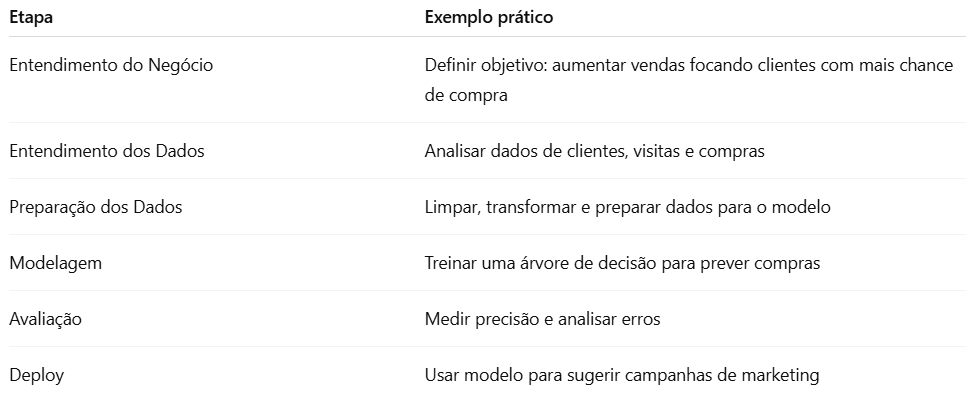

### ETAPA 6 - Deploy - Apenas um exemplo!

In [103]:
'''
Vamos usar uma ferramenta chamada Streamlit. Ela √© perfeita para o seu objetivo, pois permite criar aplica√ß√µes web com pouqu√≠ssimo c√≥digo, de forma muito visual e pr√°tica, ideal para quem est√° come√ßando.

Aqui est√° o plano, dividido em 4 partes:

1. Preparar o Notebook: Salvar o "c√©rebro" do nosso modelo e os pr√©-processadores.
2. Criar o Arquivo da Aplica√ß√£o: Escrever o c√≥digo Python (app.py) que ser√° a nossa interface web.
3. Listar as Depend√™ncias: Criar um arquivo (requirements.txt) que diz ao servidor quais bibliotecas nosso c√≥digo precisa.
4. Publicar na Web: Fazer o deploy de gra√ßa usando o Streamlit Community Cloud e o GitHub.
'''

'\nVamos usar uma ferramenta chamada Streamlit. Ela √© perfeita para o seu objetivo, pois permite criar aplica√ß√µes web com pouqu√≠ssimo c√≥digo, de forma muito visual e pr√°tica, ideal para quem est√° come√ßando.\n\nAqui est√° o plano, dividido em 4 partes:\n\n1. Preparar o Notebook: Salvar o "c√©rebro" do nosso modelo e os pr√©-processadores.\n2. Criar o Arquivo da Aplica√ß√£o: Escrever o c√≥digo Python (app.py) que ser√° a nossa interface web.\n3. Listar as Depend√™ncias: Criar um arquivo (requirements.txt) que diz ao servidor quais bibliotecas nosso c√≥digo precisa.\n4. Publicar na Web: Fazer o deploy de gra√ßa usando o Streamlit Community Cloud e o GitHub.\n'

In [104]:
'''
Parte 1: Preparar seu Notebook

Antes de criar a aplica√ß√£o, precisamos salvar os componentes essenciais que voc√™ treinou no seu notebook. O mais importante √© o modelo de Machine Learning e os "tradutores" de dados (LabelEncoder) que voc√™ usou.
'''

'\nParte 1: Preparar seu Notebook\n\nAntes de criar a aplica√ß√£o, precisamos salvar os componentes essenciais que voc√™ treinou no seu notebook. O mais importante √© o modelo de Machine Learning e os "tradutores" de dados (LabelEncoder) que voc√™ usou.\n'

In [105]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Carregar os dados
dados = pd.read_csv('bank-additional-full-ptbr.csv', sep=';')

# 2. Identificar colunas categ√≥ricas automaticamente (exceto a coluna alvo)
coluna_alvo = 'assinou_deposito'
colunas_categoricas = dados.select_dtypes(include='object').columns.tolist()
colunas_categoricas = [col for col in colunas_categoricas if col != coluna_alvo]

# 3. Aplicar LabelEncoder nas colunas categ√≥ricas
encoders = {}
for coluna in colunas_categoricas:
    le = LabelEncoder()
    dados[coluna] = le.fit_transform(dados[coluna])
    encoders[coluna] = le

# 4. Codificar a vari√°vel alvo
le_y = LabelEncoder()
dados[coluna_alvo] = le_y.fit_transform(dados[coluna_alvo])
encoders[coluna_alvo] = le_y

# 5. Separar X e y
x = dados.drop(coluna_alvo, axis=1)
y = dados[coluna_alvo]

# 6. Dividir em treino e teste com estratifica√ß√£o - preservar as mesmas propor√ß√µes de exemplos em cada classe
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)

# 7. Normalizar os dados com StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 8. Subamostragem manual da classe majorit√°ria no conjunto de treino

# Identifica √≠ndices das classes
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]

# Subamostra aleatoriamente a classe majorit√°ria para equilibrar
np.random.seed(42)
class_0_sampled = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# Combina as amostras balanceadas
balanced_indices = np.concatenate([class_0_sampled, class_1_indices])

# Aplica o balanceamento nos dados
x_train_bal = x_train[balanced_indices]
y_train_bal = y_train.iloc[balanced_indices]

# 9. Treinar modelo SVM
svm_model = SVC(
    kernel='rbf',
    probability=True,               # Necess√°rio para usar predict_proba()
    class_weight='balanced',       # Compensa o desbalanceamento
    random_state=42
)
svm_model.fit(x_train_bal, y_train_bal)

# 10. Salvar o modelo, scaler, encoders e colunas
joblib.dump(rf_model, 'modelo_svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoders, 'encoders.joblib')
joblib.dump(x.columns.tolist(), 'colunas_modelo.joblib')

print("‚úÖ Modelo, scaler e encoders salvos com sucesso!")

‚úÖ Modelo, scaler e encoders salvos com sucesso!


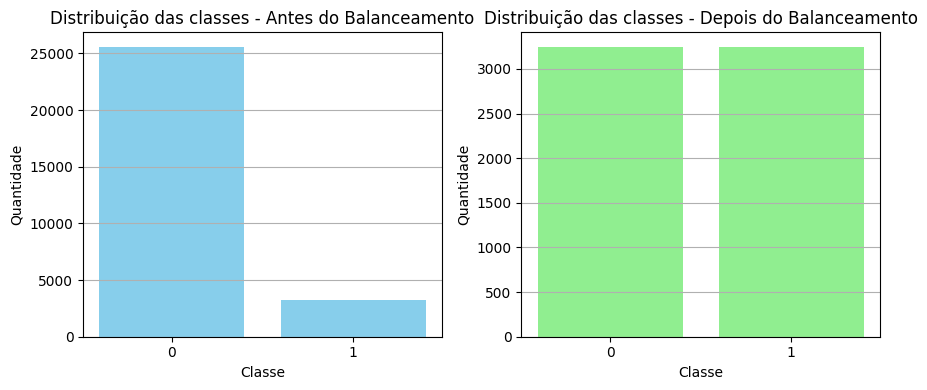

In [117]:
import matplotlib.pyplot as plt

# Contagem das classes antes do balanceamento
counts_before = y_train.value_counts().sort_index()
# Contagem das classes depois do balanceamento
counts_after = y_train_bal.value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Antes do balanceamento
axs[0].bar(counts_before.index.astype(str), counts_before.values, color='skyblue')
axs[0].set_title('Distribui√ß√£o das classes - Antes do Balanceamento')
axs[0].set_xlabel('Classe')
axs[0].set_ylabel('Quantidade')
axs[0].grid(axis='y')

# Depois do balanceamento
axs[1].bar(counts_after.index.astype(str), counts_after.values, color='lightgreen')
axs[1].set_title('Distribui√ß√£o das classes - Depois do Balanceamento')
axs[1].set_xlabel('Classe')
axs[1].set_ylabel('Quantidade')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [107]:
'''
Ap√≥s executar essa c√©lula, voc√™ ter√° 4 novos arquivos na mesma pasta do seu notebook. Eles s√£o essenciais para a pr√≥xima etapa.
'''

'\nAp√≥s executar essa c√©lula, voc√™ ter√° 4 novos arquivos na mesma pasta do seu notebook. Eles s√£o essenciais para a pr√≥xima etapa.\n'

In [108]:
'''
Parte 2: Criar o Arquivo da Aplica√ß√£o (app.py)

Agora, crie um novo arquivo de texto e salve-o com o nome app.py. Cole o seguinte c√≥digo dentro dele. Este √© o c√≥digo da nossa aplica√ß√£o web.
'''

'\nParte 2: Criar o Arquivo da Aplica√ß√£o (app.py)\n\nAgora, crie um novo arquivo de texto e salve-o com o nome app.py. Cole o seguinte c√≥digo dentro dele. Este √© o c√≥digo da nossa aplica√ß√£o web.\n'

In [109]:
'''

import streamlit as st
import pandas as pd
import joblib

# Carregar o modelo, os encoders, as colunas e o scaler
try:
    model = joblib.load('modelo_svm_model.joblib')
    encoders = joblib.load('encoders.joblib')
    model_columns = joblib.load('colunas_modelo.joblib')
    scaler = joblib.load('scaler.joblib')  # ‚úÖ carregando o scaler
except FileNotFoundError:
    st.error("Arquivos de modelo, encoders ou scaler n√£o encontrados. Certifique-se de que est√£o na mesma pasta que o app.py.")
    st.stop()

# --- FUN√á√ÉO DE PR√â-PROCESSAMENTO ---
def preprocess_input(data):
    # Cria um DataFrame com os dados do usu√°rio
    user_df = pd.DataFrame([data])

    # Aplica os encoders nas colunas categ√≥ricas
    for column, encoder in encoders.items():
        if column in user_df.columns and column != 'assinou_deposito':
            valor_usuario = user_df[column].iloc[0]
            if valor_usuario in encoder.classes_:
                user_df[column] = encoder.transform([valor_usuario])[0]
            else:
                st.error(f"Valor '{valor_usuario}' n√£o encontrado no encoder da coluna '{column}'.")
                st.stop()

    # Garante a estrutura correta das colunas
    processed_df = pd.DataFrame(columns=model_columns)
    processed_df.loc[0] = 0  # Inicializa todas as colunas com zero

    for col in user_df.columns:
        if col in processed_df.columns:
            processed_df[col] = user_df[col].values[0]

    # ‚úÖ Aplica o scaler para normalizar os dados
    processed_scaled = scaler.transform(processed_df)

    return processed_scaled

# --- INTERFACE DO USU√ÅRIO COM STREAMLIT ---

st.set_page_config(page_title="Previs√£o de Marketing Banc√°rio", layout="wide")
st.title('ü§ñ Aplica√ß√£o de Previs√£o de Ades√£o a uma Campanha Banc√°ria')
st.title('Por: Professor Carlos Santos - Instituto Federal Farroupilha C√¢mpus Alegrete')
st.write('Esta aplica√ß√£o utiliza um modelo de Machine Learning (SVM) para prever se um cliente ir√° aderir a uma campanha de marketing de um banco.')
st.write('Preencha os dados do cliente abaixo para receber a previs√£o.')

st.divider()

# Criando colunas para organizar os campos de entrada
col1, col2, col3 = st.columns(3)

# Dicion√°rio para armazenar as entradas do usu√°rio
user_input = {}

with col1:
    st.subheader("Informa√ß√µes Pessoais")
    user_input['idade'] = st.number_input('Idade', min_value=18, max_value=100, value=40)
    user_input['profissao'] = st.selectbox('Profiss√£o', options=encoders['profissao'].classes_)
    user_input['estado_civil'] = st.selectbox('Estado Civil', options=encoders['estado_civil'].classes_)
    user_input['escolaridade'] = st.selectbox('Escolaridade', options=encoders['escolaridade'].classes_)

with col2:
    st.subheader("Hist√≥rico com o Banco")
    user_input['inadimplente'] = st.selectbox('Possui Inadimpl√™ncia?', options=encoders['inadimplente'].classes_)
    user_input['saldo_medio_anual'] = st.number_input('Saldo M√©dio Anual (em Euros)', value=1500)
    user_input['emprestimo_habitacional'] = st.selectbox('Possui Empr√©stimo Imobili√°rio?', options=encoders['emprestimo_habitacional'].classes_)
    user_input['emprestimo_pessoal'] = st.selectbox('Possui Empr√©stimo Pessoal?', options=encoders['emprestimo_pessoal'].classes_)

with col3:
    st.subheader("√öltima Campanha")
    user_input['tipo_contato'] = st.selectbox('Meio de Contato', options=encoders['tipo_contato'].classes_)
    user_input['mes_contato'] = st.selectbox('√öltimo M√™s de Contato', options=encoders['mes_contato'].classes_)
    user_input['duracao_contato'] = st.number_input('Dura√ß√£o do √öltimo Contato (segundos)', value=200, min_value=0)
    user_input['numero_contatos'] = st.number_input('N¬∫ de Contatos Nesta Campanha', value=1, min_value=1)
    user_input['dias_ultimo_contato'] = st.number_input('Dias Desde o √öltimo Contato (campanha anterior)', value=-1, min_value=-1)
    user_input['contatos_anteriores'] = st.number_input('N¬∫ de Contatos (campanha anterior)', value=0, min_value=0)
    user_input['resultado_campanha_anterior'] = st.selectbox('Resultado da Campanha Anterior', options=encoders['resultado_campanha_anterior'].classes_)

# Bot√£o de Previs√£o
if st.button('Fazer Previs√£o', type="primary"):
    processed_data = preprocess_input(user_input)
    prediction_proba = model.predict_proba(processed_data)[0][1]  # probabilidade da classe "sim"
    threshold = 0.3
    prediction = int(prediction_proba >= threshold)

    st.divider()
    st.subheader('Resultado da Previs√£o:')

    resultado_texto = encoders['assinou_deposito'].inverse_transform([prediction])[0]

    if resultado_texto == 'yes':
        st.success('O cliente provavelmente VAI ADERIR √† campanha! ‚úÖ')
        st.write(f"**Confian√ßa da Previs√£o:** {prediction_proba*100:.2f}%")
    else:
        st.error('O cliente provavelmente N√ÉO VAI ADERIR √† campanha. ‚ùå')
        st.write(f"**Confian√ßa da Previs√£o:** {(1 - prediction_proba)*100:.2f}%")



'''

'\n\nimport streamlit as st\nimport pandas as pd\nimport joblib\n\n# Carregar o modelo, os encoders, as colunas e o scaler\ntry:\n    model = joblib.load(\'modelo_svm_model.joblib\')\n    encoders = joblib.load(\'encoders.joblib\')\n    model_columns = joblib.load(\'colunas_modelo.joblib\')\n    scaler = joblib.load(\'scaler.joblib\')  # ‚úÖ carregando o scaler\nexcept FileNotFoundError:\n    st.error("Arquivos de modelo, encoders ou scaler n√£o encontrados. Certifique-se de que est√£o na mesma pasta que o app.py.")\n    st.stop()\n\n# --- FUN√á√ÉO DE PR√â-PROCESSAMENTO ---\ndef preprocess_input(data):\n    # Cria um DataFrame com os dados do usu√°rio\n    user_df = pd.DataFrame([data])\n\n    # Aplica os encoders nas colunas categ√≥ricas\n    for column, encoder in encoders.items():\n        if column in user_df.columns and column != \'assinou_deposito\':\n            valor_usuario = user_df[column].iloc[0]\n            if valor_usuario in encoder.classes_:\n                user_df[co

In [110]:
'''
Parte 3: Listar as Depend√™ncias (requirements.txt)

Crie outro arquivo de texto, chamado requirements.txt. Ele informa ao servidor de quais bibliotecas Python sua aplica√ß√£o precisa para funcionar.
Cole o seguinte conte√∫do nele:
'''

'\nParte 3: Listar as Depend√™ncias (requirements.txt)\n\nCrie outro arquivo de texto, chamado requirements.txt. Ele informa ao servidor de quais bibliotecas Python sua aplica√ß√£o precisa para funcionar.\nCole o seguinte conte√∫do nele:\n'

In [111]:
'''

pandas
scikit-learn
streamlit
joblib

'''

'\n\npandas\nscikit-learn\nstreamlit\njoblib\n\n'

In [112]:
'''
Obs: As vers√µes s√£o importantes para garantir a compatibilidade. Essas s√£o vers√µes recentes e est√°veis.
'''

'\nObs: As vers√µes s√£o importantes para garantir a compatibilidade. Essas s√£o vers√µes recentes e est√°veis.\n'

In [113]:
'''

Parte 4: Publicar na Web (O Deploy)

Esta √© a parte final! Vamos colocar sua aplica√ß√£o no ar de gra√ßa.

Pr√©-requisitos:

Voc√™ precisa de uma conta no GitHub. Se n√£o tiver, crie uma, √© gr√°tis.
Passos:

1. Crie um Reposit√≥rio no GitHub:

 - V√° para o GitHub e crie um novo reposit√≥rio p√∫blico. D√™ um nome a ele, como previsao-marketing-app.

2. Fa√ßa o Upload dos Arquivos:

 - No reposit√≥rio que voc√™ acabou de criar, fa√ßa o upload dos 6 arquivos que temos:
   - app.py (sua aplica√ß√£o web)
   - requirements.txt (as depend√™ncias)
   - modelo_random_forest.joblib (o modelo salvo)
   - encoders.joblib (os encoders salvos)
   - scaler.joblib
   - colunas_modelo.joblib (a lista de colunas)

3. Fa√ßa o Deploy com o Streamlit Community Cloud:

 - V√° para o site: share.streamlit.io
 - Clique em "Sign in with GitHub" e autorize o acesso.
 - Clique no bot√£o "New app".
 - No campo "Repository", escolha o reposit√≥rio que voc√™ criou.
 - O Streamlit vai preencher automaticamente o nome do arquivo principal (app.py).
 - Clique no bot√£o "Deploy!".

Pronto! O Streamlit vai come√ßar a instalar as depend√™ncias e configurar sua aplica√ß√£o. Em 1 ou 2 minutos, voc√™ ter√° um link p√∫blico para sua aplica√ß√£o web interativa, que poder√° compartilhar com qualquer pessoa!

'''

'\n\nParte 4: Publicar na Web (O Deploy)\n\nEsta √© a parte final! Vamos colocar sua aplica√ß√£o no ar de gra√ßa.\n\nPr√©-requisitos:\n\nVoc√™ precisa de uma conta no GitHub. Se n√£o tiver, crie uma, √© gr√°tis.\nPassos:\n\n1. Crie um Reposit√≥rio no GitHub:\n\n - V√° para o GitHub e crie um novo reposit√≥rio p√∫blico. D√™ um nome a ele, como previsao-marketing-app.\n\n2. Fa√ßa o Upload dos Arquivos:\n\n - No reposit√≥rio que voc√™ acabou de criar, fa√ßa o upload dos 6 arquivos que temos:\n   - app.py (sua aplica√ß√£o web)\n   - requirements.txt (as depend√™ncias)\n   - modelo_random_forest.joblib (o modelo salvo)\n   - encoders.joblib (os encoders salvos)\n   - scaler.joblib\n   - colunas_modelo.joblib (a lista de colunas)\n\n3. Fa√ßa o Deploy com o Streamlit Community Cloud:\n\n - V√° para o site: share.streamlit.io\n - Clique em "Sign in with GitHub" e autorize o acesso.\n - Clique no bot√£o "New app".\n - No campo "Repository", escolha o reposit√≥rio que voc√™ criou.\n - O Streamli